<a href="https://colab.research.google.com/gist/jonghank/2223af6232d920e17eb8d15d2c6df0ae/ase3001_exercises_power_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power demand prediction

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

---

전력 공급 설비에서는 적시에 부족함이 없는 전력을 공급하기 위해 사용자들의 전력 사용량을 예측할 필요가 있다.
한 가지 방법으로 일정 과거 시간 동안의 데이타를 통해 미래의 데이타를 예측하는 _auto-regressive_ (AR) 모델이 사용될 수 있다.

이 문제에서 설계할 AR 예측기는 정규화된 과거 $h$ 시간 동안의 전력 사용량 $z_{t-1}, z_{t-2},\dots,z_{t-h}$을 아래와 같이 입력받아, 현재의 전력 사용량 $z_{t}$를 예측하는 모델로,

$$
  \hat{z}_{t} = f(z_{t-1}, z_{t-2}, \dots, z_{t-h})
$$

과거 $T\ (T\gg h)$ 시간 동안의 전력 사용량 데이타로부터 아래와 같은 입력-출력 데이타 세트를 구성한 후

$$
x^{(t)} = \bmat{1 & z_{t-1} & \cdots & z_{t-h}}, \qquad y^{(t)} = z_{t}, \qquad t = h+1, \dots, T,
$$

아래와 같은 선형 예측 모델을 설계할 수 있다.

$$
\begin{align*}
  \hat{y}^{(t)} &= \hat{z}_{t} \\
  &= \theta_1 + \theta_2 z_{t-1} + \cdots + \theta_{h+1} z_{t-h}\\
  &= \theta^Tx^{(t)}
\end{align*}
$$

여기서 예측기 파라미터 $\theta \in \R^{h + 1}$는 주어진 과거 전력 사용량 데이타를 가장 잘 설명하도록 선택되어야 한다. 즉, 아래의 empirical risk를 최소화하도록 $\theta$가 설계되어야 한다.

$$
  \eloss(\hat{y},y)= \sum_{t=h+1}^{T} \left(\hat{y}^{(t)}-y^{(t)}\right)^2 =  \sum_{i=h+1}^{T} \left(\hat{z}_{t}-z_{t}\right)^2
$$

위의 최적해 $\theta$를 찾은 후에는 아래와 같은 방법으로 주어지지 않은 미래의 데이타 $z_{T+1}$을 예측할 수 있다.

$$
\begin{align*}
\hat{z}_{T+1} &= \theta^Tx^{(T+1)} \\
&= \theta_1 + \theta_2 z_{T} + \cdots + \theta_{h+1} z_{T-h}
\end{align*}
$$


<br>

아래의 셀을 로드하면 `numpy array` `p`는 캘리포니아에서 2015년 7월부터 2017년 12월까지 $T=20832$ 시간동안 사용된 시간별 전력량을 담고 있는 시계열 데이타 $p_1, p_2, \dots, p_{20832}$를 담고 있다. 이 문제에서는 이 데이타 세트를 사용하여 미래 2주 동안의 전력 사용량을 예측하는 AR 예측모델을 설계하려고 한다.

20832


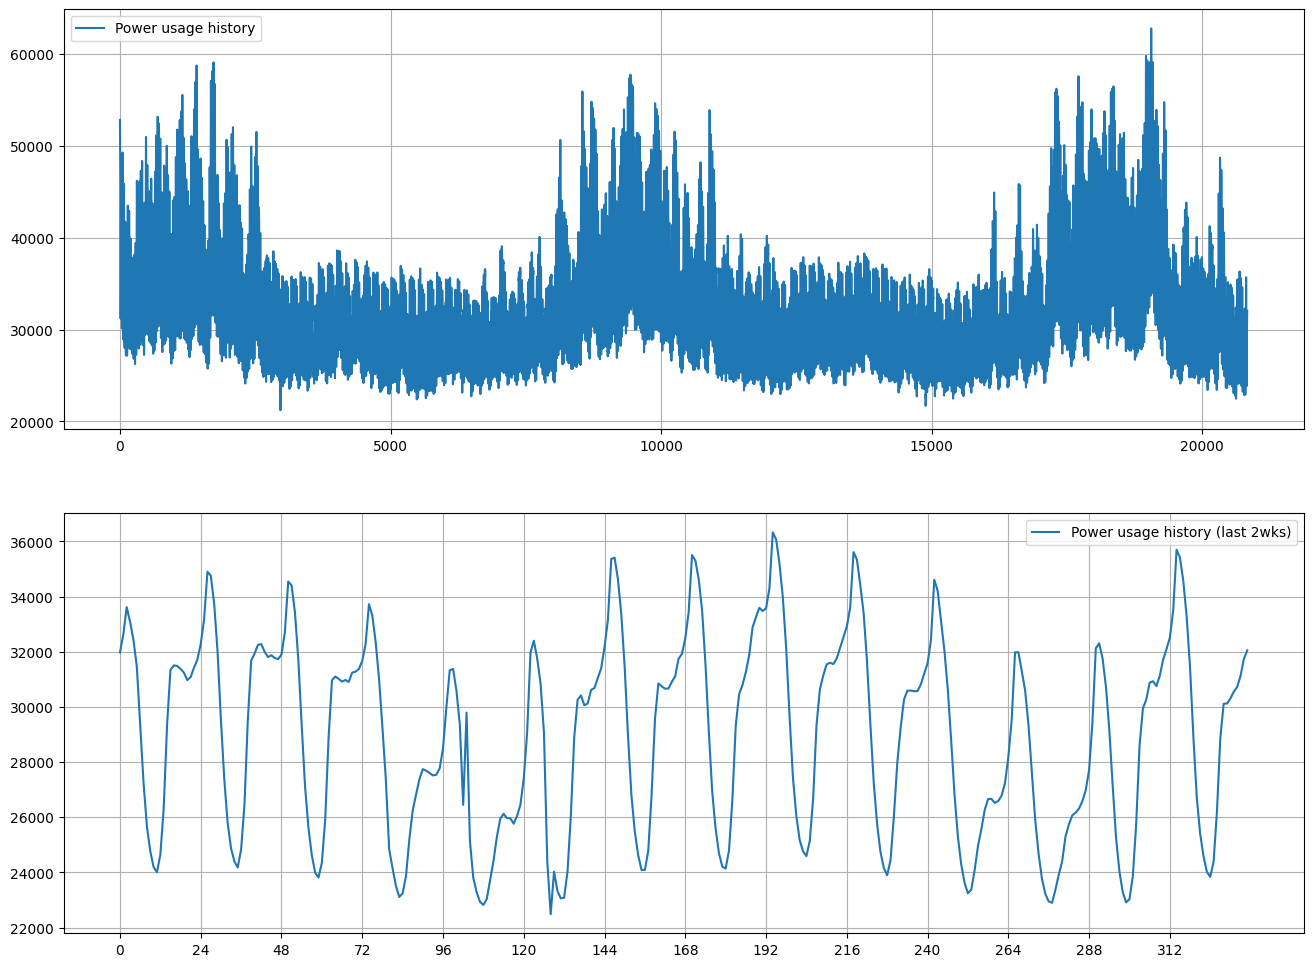

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p0 = np.loadtxt('http://jonghank.github.io/ase3001/files/power_history_cut.csv', delimiter=',')
dummy_data = p0[-(24*7):]
p = p0[:-(24*7)]
T = len(p)
print(T)

plt.figure(figsize=(16,12))
plt.subplot(211)
plt.plot(p, label='Power usage history')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(p[-24*14:], label='Power usage history (last 2wks)')
plt.xticks (np.arange(0,24*14,24))
plt.legend()
plt.grid()
plt.show()

<br>

**(Problem 1)** 주어진 전력 소모량 데이타 $p_t$를 아래와 같이 정규화하여 $z_t$로 변환하시오.

$$
z_t = \frac{p_t - \bar{p}}{\sigma_p}
$$

여기서 $\bar{p}$와 $\sigma_p$는 $p_1, \dots, p_T$의 평균과 표준편차이다.

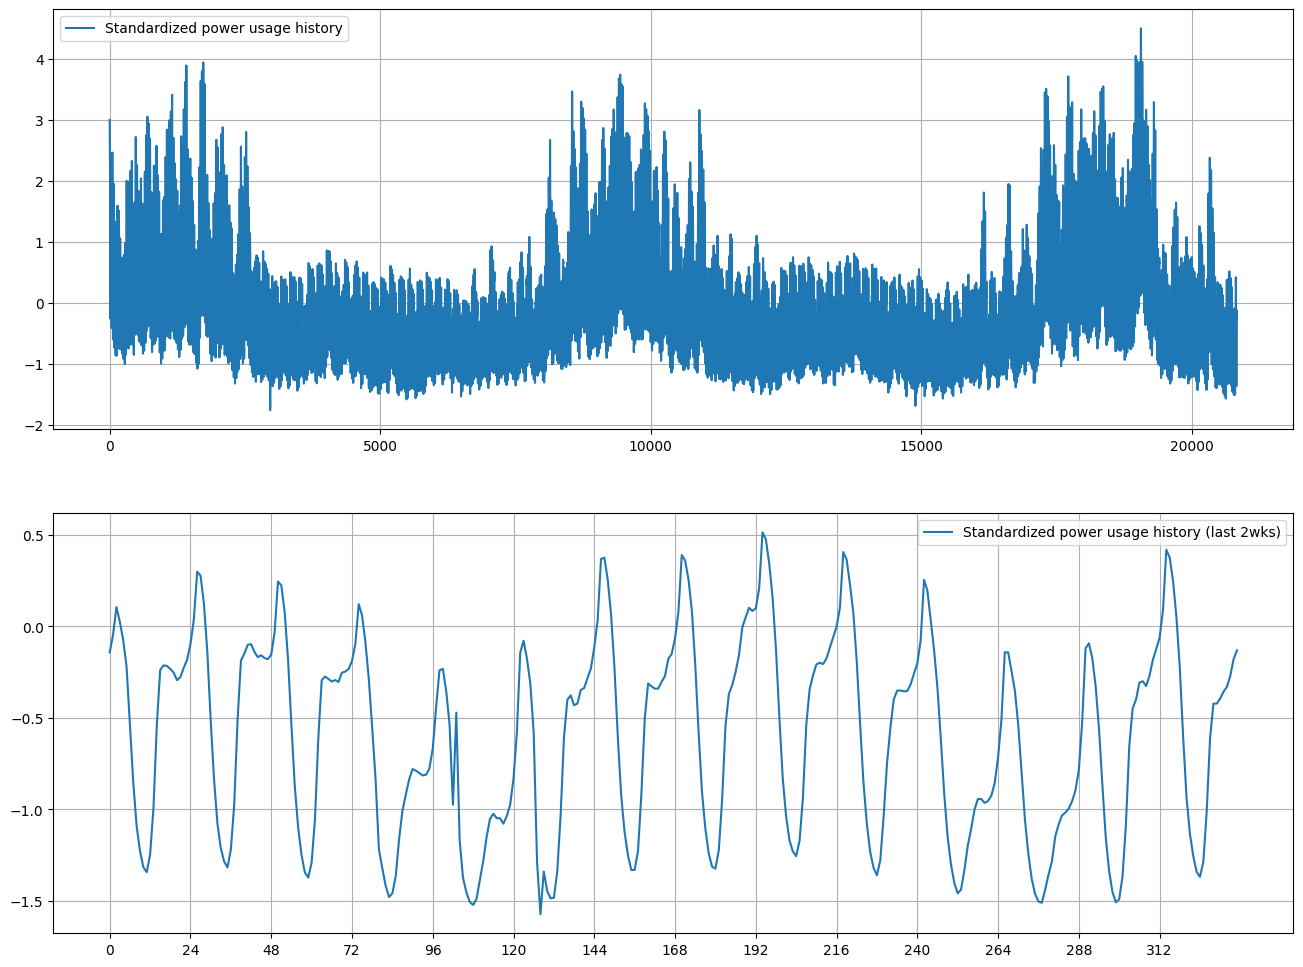

In [ ]:
# your code here


<br>

**(Problem 2)** 주어진 모든 데이타 세트를 활용하여, 2주에 해당하는 과거 데이타($h=336$)를 담고 있는 피처 벡터 $x^{(h+1)}, x^{(h+2)},\dots, x^{(T)}$와 출력값 $y^{(h+1)}, y^{(h+2)},\dots, y^{(T)}$를 만들어낸 후, 아래의 데이타 행렬/벡터를 형성하시오.

$$
X = \bmat{x^{(h+1)} \\ \vdots \\ x^{(T)}} \in\R^{(T-h)\times(h+1)}, \quad
y = \bmat{y^{(h+1)} \\ \vdots \\ y^{(T)}} \in\R^{T-h}
$$

In [ ]:
# your code here


<br>

**(Problem 3)** 위에서 형성한 데이타 행렬 중 처음 2년치의 데이타 세트($n_\text{train} =17520$)를 training set으로 사용하고, 나머지는 validation set으로 사용하려고 한다. 데이타 세트로 아래와 같이 분할하시오.

$$
X = \bmat{X_\text{train} \\ X_\text{valid}}, \quad
y = \bmat{y_\text{train} \\ y_\text{valid}}
$$

여기서 $X_\text{train}\in\R^{17520\times(h+1)}$, $y_\text{train}\in\R^{17520}$이다. 아래의 empirical risk를 최소화함으로써 training set의 데이타를 가장 잘 설명할 수 있는 최적의 AR 예측기 파라미터 $\theta\in\R^{h+1}$를 구하시오.

$$
\eloss(\theta) = \sum_{t=h+1}^{h+n_\text{train}}\left(\hat{y}^{(t)}-y^{(t)}\right)^2
$$




In [ ]:
# your code here


<br>

**(Problem 4)** 위에서 구한 최적의 AR 예측기 파라미터를 도시하고, 파라미터들에서 관찰되는 패턴의 의미를 설명하시오.

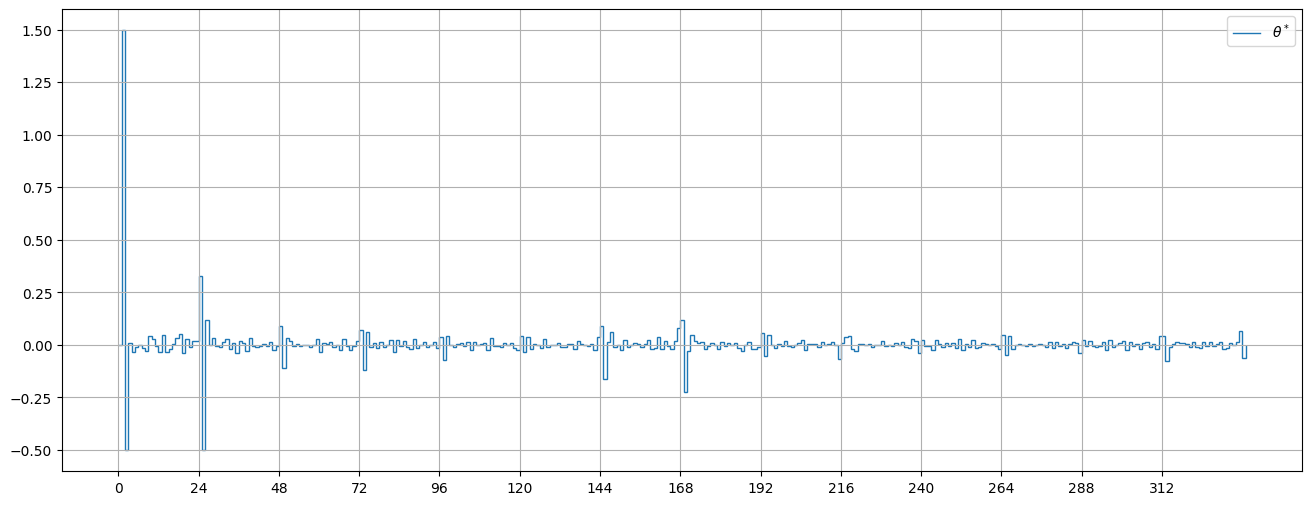

In [ ]:
# your code here


<br>

**(Problem 5)** Traning set에 대해, 설계된 예측기의 RMSE를 추산하고 이 수치의 의미를 설명하시오. 이 수치가 작으면 설계된 AR 예측 모델이 훈련 과정에서 사용된 데이타인 $X_\text{train}$, $y_\text{train}$에 주어진 데이타세트를 잘 설명함을 의미한다.

In [ ]:
# your code here


Train RMSE: 0.04114359006733518


<br>

**(Problem 6)** Validation set에 대해, 설계된 예측기의 RMSE를 추산하고 이 수치의 의미를 설명하시오. 이 수치가 작으면 설계된 AR 예측 모델이 훈련 과정에서 사용되지 않았던 새로운 데이타인 $X_\text{valid}$, $y_\text{valid}$ 세트에 대해서도 잘 동작함을 의미하며, 미래에 들어올 데이타에 대해서도 실제 데이타를 그럴 듯하게 잘 예측할 것으로 기대할 수 있다.

In [ ]:
# your code here


Validation RMSE: 0.05153197421401647


<br>

**(Problem 7)** 설계된 AR 예측기를 이용하여 주어진 데이타세트로부터 1시간씩 순서대로 미래를 예측하여 앞으로 1주 후까지의 전력 사용량을 예측하시오. 주어진 데이타의 마지막 2주 데이터에 연장하여 예측 결과를 그래프로 도시하시오. 매래 1주일 중 어느 순간에 가장 높은 전력이 요구될지 예상치와 시점을 제시하시오.


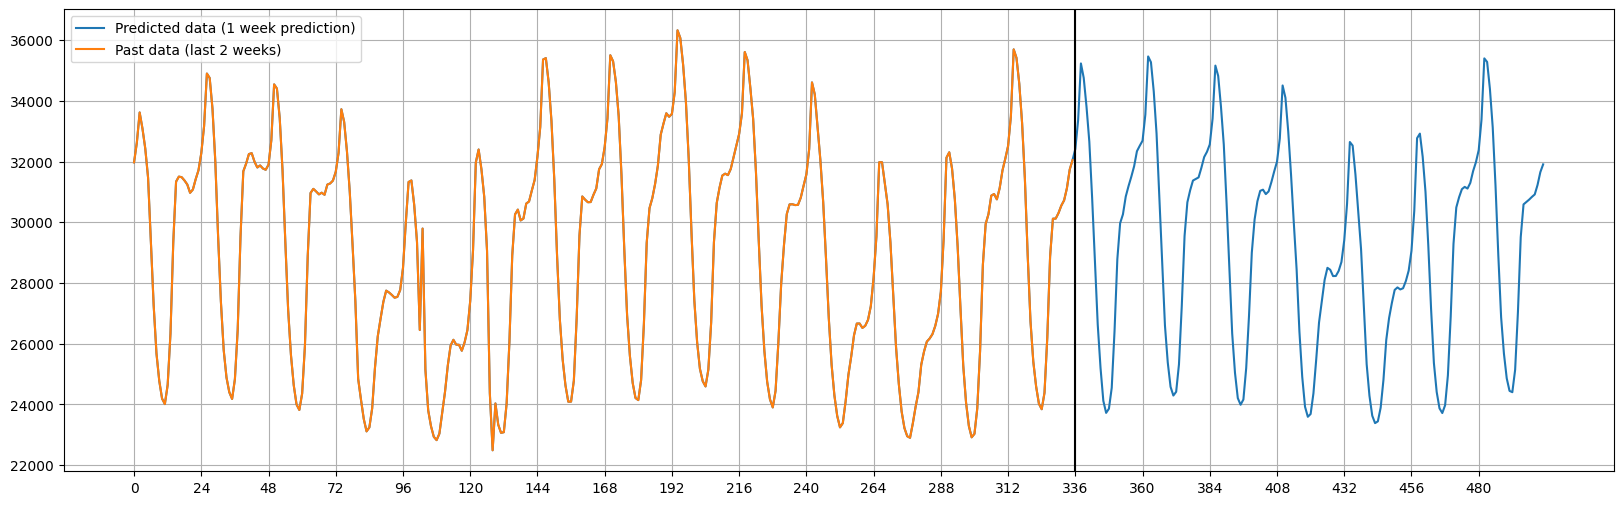

In [ ]:
# your code here


<br>

**(Problem 8)** 처음에 로드했던 데이타 중 `dummy_data`에는 위 문제에서 우리가 예측하려고 했던 미래 1주일의 실제 전력사용량인 $p_{20833},p_{20844},\dots,p_{21000}$이 담겨져있다. 위에서 도시했던 플롯에 이 데이타를 함께 그려보고 AR 예측기가 예측했던 데이타와 실제 데이타가 얼마나 비슷한지 확인하시오.

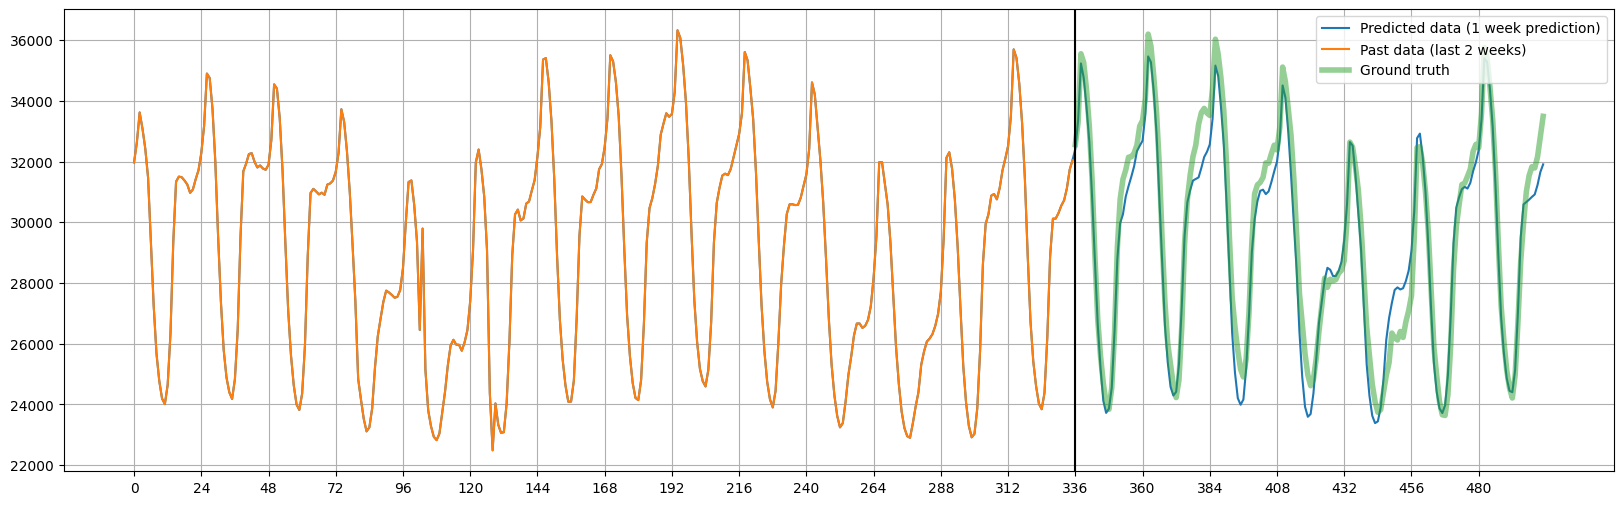

In [ ]:
# your code here
